### Import Libraries

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### Define max number of rows and columns to be displayed

In [2]:
# Max amt of rows = 999
pd.options.display.max_rows = 999

# Max amt of colms = 99
pd.options.display.max_columns = 90

### Load Data (SQL DB)


In [3]:
con = sqlite3.connect("/content/bmarket.db")

In [4]:
cursor = con.cursor()

# Query the sqlite_master table to get table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
table_names = [row[0] for row in cursor.fetchall()]
table_names

['bank_marketing']

In [5]:
# Select table from table_names
query = "SELECT * FROM bank_marketing"

# Read db as pd df
df = pd.read_sql_query(query, con)

### Inital Data Understanding and Insights

In [6]:
# Print the respective informations of the db to discover insights
print("Data Overview:")
df.info()

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [7]:
# Display first 5 of df
df.head(5)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


In [8]:
# Inital Df shape b4 cleaning
print(f"DF Shape: {df.shape}")

DF Shape: (41188, 12)


### Data Cleaning

In [9]:
# Check for blank input
print(f"Blank Input: \n{df.isnull().sum()}")

Blank Input: 
Client ID                    0
Age                          0
Occupation                   0
Marital Status               0
Education Level              0
Credit Default               0
Housing Loan             24789
Personal Loan             4146
Contact Method               0
Campaign Calls               0
Previous Contact Days        0
Subscription Status          0
dtype: int64


In [10]:
# Check for duplicated rows
print(f"Duplicated Rows: \n{df.duplicated().sum()}")

Duplicated Rows: 
0


### Cilent ID

In [11]:
# Cilent ID
# Check for unique amount of Client ID to make sure it correlate with the df.shape
print(f"Unique Client ID: {df['Client ID'].nunique()}")

Unique Client ID: 41188


### Age

In [12]:
# Age
# Check for amount of Age to make sure it correlate with the df.shape
print(f"Amount for 'Age' column: {df['Age'].value_counts().sum()}")

# Replace the text years to blank. Afterwards convert dtype to int (RUN ONCE)
df['Age'] = df['Age'].str.replace(' years', '').astype(int)

# Check for Age changes
df.info()

# Print df
print(f"\nUpdated Age Data: \n{df["Age"].value_counts()}")

Amount for 'Age' column: 41188
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  int64 
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.8+ MB

Updated Age Data: 
Age
150    4197
31     1747
32     1646
33     1643
36     1606
35     1584


In [13]:
# mark unrealistic ages (>100) as missing
df.loc[(df['Age'] < 1) | (df['Age'] > 100), 'Age'] = np.nan

# impute by Occupation + Education Level
df['Age'] = df.groupby(['Occupation', 'Education Level'])['Age'] \
                  .transform(lambda x: x.fillna(x.median()))

# if any missing left, impute by Occupation
df['Age'] = df.groupby(['Occupation'])['Age'] \
                  .transform(lambda x: x.fillna(x.median()))

# final fallback: dataset median
df['Age'] = df['Age'].fillna(df['Age'].median())

# convert to integer
df['Age'] = df['Age'].astype(int)

In [14]:
df["Age"]

,Age
0,57
1,55
2,33
3,36
4,27
...,...
41183,58
41184,37
41185,35
41186,40


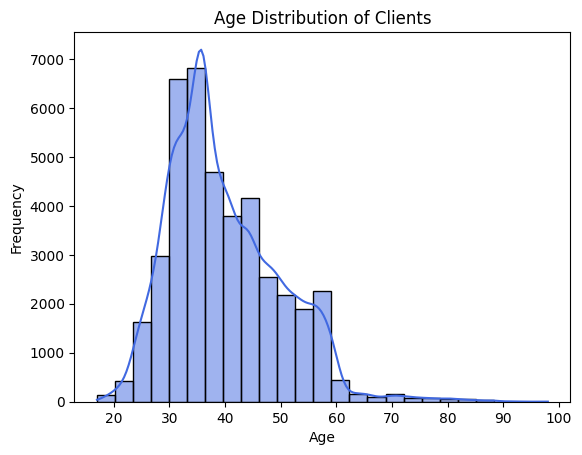

In [15]:
# Age distribution
sns.histplot(df['Age'], bins=25, kde=True, color='royalblue')
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Occupation

In [16]:
# Occupation
print("BEFORE CLEANING")
# Check for amount of Occupation to make sure it correlate with the df.shape
print(f"Amount for 'Occupation' column: {df['Occupation'].value_counts().sum()}")

# Print Value count as a list
print(f"\nOccupation Value Counts:\n{list(df['Occupation'].value_counts().items())}")

BEFORE CLEANING
Amount for 'Occupation' column: 41188

Occupation Value Counts:
[('admin.', 10422), ('blue-collar', 9254), ('technician', 6743), ('services', 3969), ('management', 2924), ('retired', 1720), ('entrepreneur', 1456), ('self-employed', 1421), ('housemaid', 1060), ('unemployed', 1014), ('student', 875), ('unknown', 330)]


In [17]:
print("AFTER CLEANING")
# Remove '.' from 'admin.'
df['Occupation'] = df['Occupation'].str.replace('.', '', regex=False)

# Check for amount of Occupation to make sure it correlate with the df.shape after cleaning
print(f"Amount for 'Occupation' column: {df['Occupation'].value_counts().sum()}")

# Print Value count as a list of (occupation, count) tuples
print(f"\nOccupation Value Counts:\n{list(df['Occupation'].value_counts().items())}")

AFTER CLEANING
Amount for 'Occupation' column: 41188

Occupation Value Counts:
[('admin', 10422), ('blue-collar', 9254), ('technician', 6743), ('services', 3969), ('management', 2924), ('retired', 1720), ('entrepreneur', 1456), ('self-employed', 1421), ('housemaid', 1060), ('unemployed', 1014), ('student', 875), ('unknown', 330)]


### Marital Status

In [18]:
# Marital Status
print("BEFORE CLEANING")
# Check for amount of Marital Status to make sure it correlate with the df.shape
print(f"Amount for 'Marital Status' column: {df['Marital Status'].value_counts().sum()}")

# Print Value count as a list
print(f"\nMarital Status Value Counts:\n{list(df['Marital Status'].value_counts().items())}")

# Unknown stays for the same reason as Education Level

BEFORE CLEANING
Amount for 'Marital Status' column: 41188

Marital Status Value Counts:
[('married', 24928), ('single', 11568), ('divorced', 4612), ('unknown', 80)]


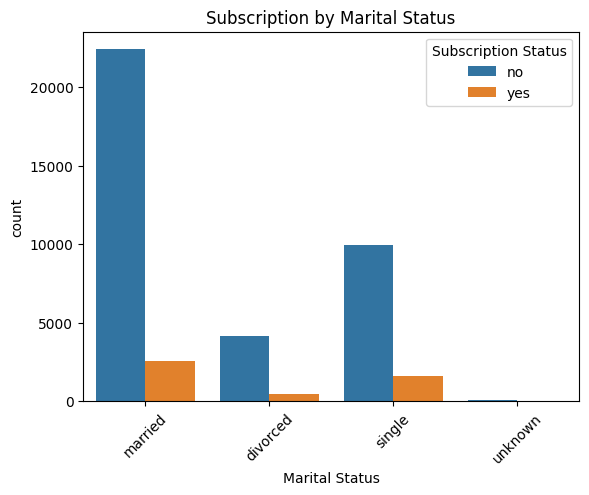

In [19]:
# Subscription by marital status
sns.countplot(x='Marital Status', hue='Subscription Status', data=df)
plt.title("Subscription by Marital Status")
plt.xticks(rotation=45)
plt.show()

### Education Level

In [20]:
# Education Level
print("BEFORE CLEANING")
# Check for amount of Education Level to make sure it correlate with the df.shape
print(f"Amount for 'Education Level' column: {df['Education Level'].value_counts().sum()}")

# Print Value count as a list
print(f"\nEducation Level Value Counts:\n{list(df['Education Level'].value_counts().items())}")

BEFORE CLEANING
Amount for 'Education Level' column: 41188

Education Level Value Counts:
[('university.degree', 12168), ('high.school', 9515), ('basic.9y', 6045), ('professional.course', 5243), ('basic.4y', 4176), ('basic.6y', 2292), ('unknown', 1731), ('illiterate', 18)]


In [21]:
print("AFTER CLEANING")
# Replace '.' from ' '
df['Education Level'] = df['Education Level'].str.replace('.', ' ', regex=False)

# Check for amount of Occupation to make sure it correlate with the df.shape after cleaning
print(f"Amount for 'Education Level' column: {df['Education Level'].value_counts().sum()}")

# Print Value count as a list of (occupation, count) tuples
print(f"\nEducation Level Value Counts:\n{list(df['Education Level'].value_counts().items())}")

AFTER CLEANING
Amount for 'Education Level' column: 41188

Education Level Value Counts:
[('university degree', 12168), ('high school', 9515), ('basic 9y', 6045), ('professional course', 5243), ('basic 4y', 4176), ('basic 6y', 2292), ('unknown', 1731), ('illiterate', 18)]


In [22]:
# Convert basic 4y etc to basic
df['Education Level'] = df['Education Level'].str.replace(r'basic \d+y', 'basic', regex=True)

# Print Value count as a list to verify changes
print(f"\nEducation Level Value Counts (after consolidating 'basic'):\n{list(df['Education Level'].value_counts().items())}")


Education Level Value Counts (after consolidating 'basic'):
[('basic', 12513), ('university degree', 12168), ('high school', 9515), ('professional course', 5243), ('unknown', 1731), ('illiterate', 18)]


In [23]:
# Keep it as unknown as some customers can choose to not disclose it
df[df["Education Level"] == "unknown"]

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
1,3170,55,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
41,12663,38,blue-collar,married,unknown,unknown,None,no,cellular,3,999,no
75,217,30,blue-collar,single,unknown,no,None,no,telephone,1,999,no
111,18295,38,admin,married,unknown,no,yes,no,Cell,3,999,no
122,22493,54,blue-collar,married,unknown,unknown,None,yes,Cell,1,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41137,3944,47,services,married,unknown,unknown,yes,yes,Telephone,6,999,no
41153,30741,34,blue-collar,married,unknown,no,yes,no,Cell,1,999,no
41175,2434,50,services,married,unknown,unknown,None,no,Telephone,1,999,no
41177,1686,58,management,married,unknown,unknown,yes,no,Telephone,1,999,no


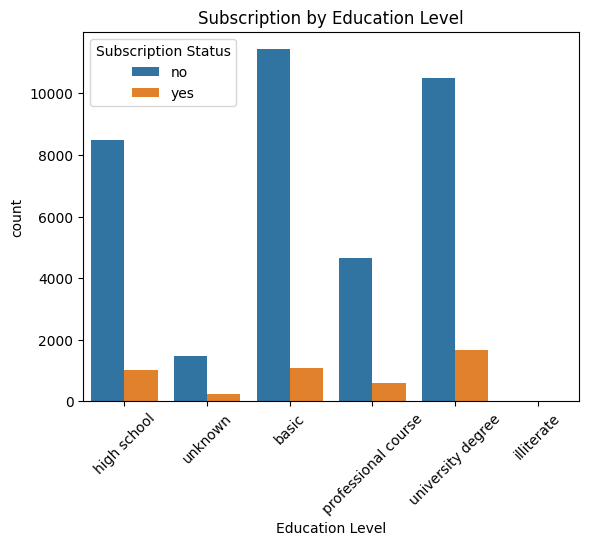

In [25]:
# Subscription by education level
sns.countplot(x='Education Level', hue='Subscription Status', data=df)
plt.title("Subscription by Education Level")
plt.xticks(rotation=45)
plt.show()

### Credit Default

In [ ]:
# Credit Default
print("BEFORE CLEANING")
# Check for amount of Credit Default to make sure it correlate with the df.shape
print(f"Amount for 'Credit Default' column: {df['Credit Default'].value_counts().sum()}")

# Print Value count as a list
print(f"\nCredit Default Value Counts:\n{list(df['Credit Default'].value_counts().items())}")

BEFORE CLEANING
Amount for 'Credit Default' column: 41188

Credit Default Value Counts:
[('no', 32588), ('unknown', 8597), ('yes', 3)]


In [ ]:
print("AFTER CLEANING")
# Replace 'unknown' with 'no' in 'Credit Default'
df['Credit Default'] = df['Credit Default'].replace('unknown', 'no')

# Print Value count as a list to verify changes
print(f"\nCredit Default Value Counts (after cleaning):\n{list(df['Credit Default'].value_counts().items())}")

AFTER CLEANING

Credit Default Value Counts (after cleaning):
[('no', 41185), ('yes', 3)]


### Housing Loan

In [26]:
# Housing Loan
print("BEFORE CLEANING")
# Check for amount of Housing Loan to make sure it correlate with the df.shape
print(f"Amount for 'Housing Loan' column: {df['Housing Loan'].value_counts().sum()}")

# Print Value count as a list
print(f"\nHousing Loan Value Counts:\n{list(df['Housing Loan'].value_counts().items())}")

BEFORE CLEANING
Amount for 'Housing Loan' column: 16399

Housing Loan Value Counts:
[('yes', 8595), ('no', 7411), ('unknown', 393)]


### Contact Method

In [27]:
# Contact Method
print("BEFORE CLEANING")
# Check for amount of Contact Method  to make sure it correlate with the df.shape
print(f"Amount for 'Contact Method' column: {df['Contact Method'].value_counts().sum()}")

# Print Value count as a list
print(f"\nContact Method  Value Counts:\n{list(df['Contact Method'].value_counts().items())}")

BEFORE CLEANING
Amount for 'Contact Method' column: 41188

Contact Method  Value Counts:
[('Cell', 13100), ('cellular', 13044), ('Telephone', 7585), ('telephone', 7459)]


In [28]:
print("AFTER CLEANING")

# Standardize 'Contact Method' column
df['Contact Method'] = df['Contact Method'].replace({'Cell': 'cellular', 'Telephone': 'telephone'})

# Check for amount of Contact Method  to make sure it correlate with the df.shape
print(f"Amount for 'Contact Method' column: {df['Contact Method'].value_counts().sum()}")

# Display updated value counts for 'Contact Method'
print(f"\nContact Method Value Counts (after cleaning):\n{list(df['Contact Method'].value_counts().items())}")

AFTER CLEANING
Amount for 'Contact Method' column: 41188

Contact Method Value Counts (after cleaning):
[('cellular', 26144), ('telephone', 15044)]


### Campaign Calls

In [29]:
# Campaign Calls
print("BEFORE CLEANING")
# Check for amount of Campaign Calls  to make sure it correlate with the df.shape
print(f"Amount for 'Campaign Calls' column: {df['Campaign Calls'].value_counts().sum()}")

# Print Value count as a list
print(f"\nCampaign Calls  Value Counts:\n{list(df['Campaign Calls'].value_counts().items())}")

# Check for min value
print(f"\nMin Value: {df['Campaign Calls'].min()}")

# Check for max value
print(f"Max Value: {df['Campaign Calls'].max()}")

BEFORE CLEANING
Amount for 'Campaign Calls' column: 41188

Campaign Calls  Value Counts:
[(1, 15874), (2, 9446), (3, 4807), (4, 2405), (-1, 1768), (5, 1451), (-2, 1124), (6, 893), (7, 566), (-3, 534), (8, 365), (9, 253), (-4, 246), (10, 206), (11, 156), (-5, 148), (12, 107), (-6, 86), (13, 84), (-7, 63), (14, 58), (17, 51), (15, 47), (16, 46), (-8, 35), (-9, 30), (18, 30), (20, 27), (19, 24), (21, 22), (-11, 21), (-10, 19), (-12, 18), (24, 15), (22, 14), (27, 11), (-14, 11), (23, 11), (29, 9), (-13, 8), (26, 8), (30, 7), (31, 7), (-17, 7), (25, 7), (28, 6), (-23, 5), (-16, 5), (-15, 4), (33, 4), (34, 3), (32, 3), (-18, 3), (-22, 3), (-20, 3), (35, 3), (42, 2), (-28, 2), (43, 2), (40, 2), (-21, 2), (-35, 2), (-19, 2), (-29, 1), (-32, 1), (56, 1), (-41, 1), (39, 1), (37, 1), (-25, 1)]

Min Value: -41
Max Value: 56


In [30]:
# change values below 0 to 0 as you cannot have negative campaign calls
df.loc[df['Campaign Calls'] < 0, 'Campaign Calls'] = 0

# Check for min value
print(f"Min Value: {df['Campaign Calls'].min()}")

# Check for max value
print(f"Max Value: {df['Campaign Calls'].max()}")

Min Value: 0
Max Value: 56


### Previous Contact Days

In [31]:
# Previous Contact Days
print("BEFORE CLEANING")
# Check for amount of Previous Contact Days  to make sure it correlate with the df.shape
print(f"Amount for 'Previous Contact Days' column: {df['Previous Contact Days'].value_counts().sum()}")

# Print Value count as a list
print(f"\nPrevious Contact Days Value Counts:\n{list(df['Previous Contact Days'].value_counts().items())}")

BEFORE CLEANING
Amount for 'Previous Contact Days' column: 41188

Previous Contact Days Value Counts:
[(999, 39673), (3, 439), (6, 412), (4, 118), (9, 64), (2, 61), (7, 60), (12, 58), (10, 52), (5, 46), (13, 36), (11, 28), (1, 26), (15, 24), (14, 20), (8, 18), (0, 15), (16, 11), (17, 8), (18, 7), (19, 3), (22, 3), (21, 2), (26, 1), (27, 1), (20, 1), (25, 1)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  int64 
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.8+ MB


In [32]:
# Check for min value
print(f"Min Value: {df['Previous Contact Days'].min()}")

# Check for max value
print(f"Max Value: {df['Previous Contact Days'].max()}")

# Can leave it as its correct dtype and there are no negative values

Min Value: 0
Max Value: 999


### Subscription Status

In [33]:
# Subscription Status Days
print("BEFORE CLEANING")
# Check for amount of Subscription Status Days  to make sure it correlate with the df.shape
print(f"Amount for 'Subscription Status' column: {df['Subscription Status'].value_counts().sum()}")

# Print Value count as a list
print(f"\nSubscription Status Value Counts:\n{list(df['Subscription Status'].value_counts().items())}")

# Can Leave it

BEFORE CLEANING
Amount for 'Subscription Status' column: 41188

Subscription Status Value Counts:
[('no', 36548), ('yes', 4640)]


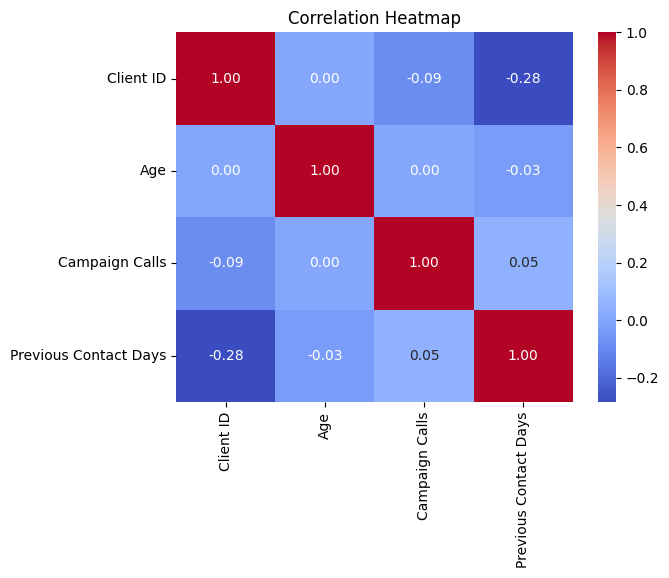

In [37]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

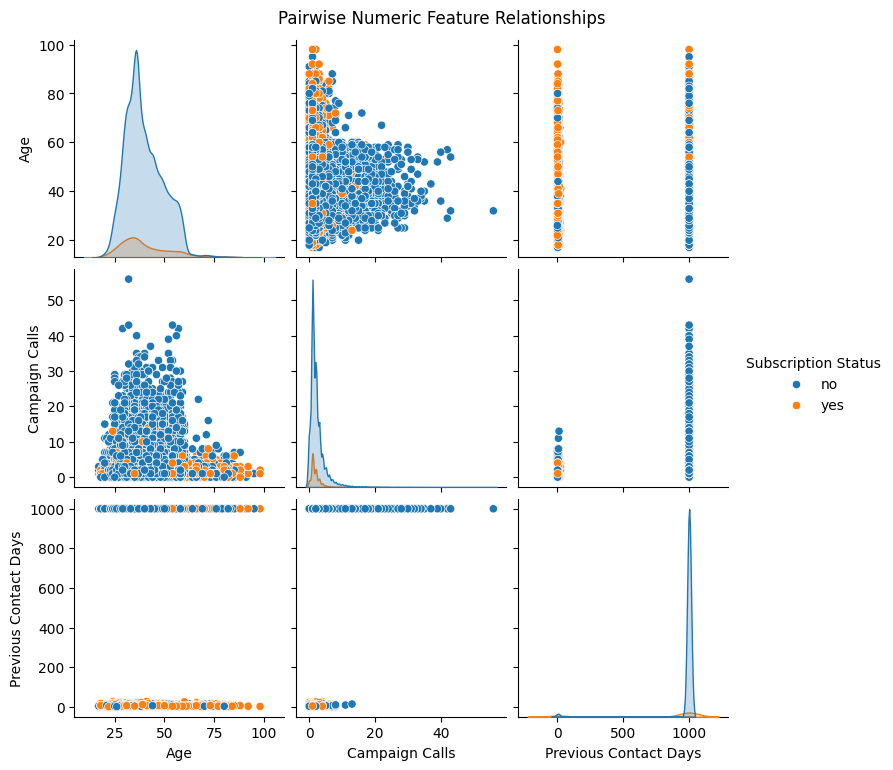

In [35]:
# Pairplot to explore patterns
sns.pairplot(df, vars=['Age', 'Campaign Calls', 'Previous Contact Days'], hue='Subscription Status')
plt.suptitle("Pairwise Numeric Feature Relationships", y=1.02)
plt.show()

Saving

In [ ]:
con_updated = sqlite3.connect("/content/bmarket_updated.db")

In [ ]:
df.to_sql('bank_marketing', con_updated, if_exists='replace', index=False)
print("DataFrame successfully saved to 'bmarket_updated.db'")

DataFrame successfully saved to 'bmarket_updated.db'


In [ ]:
df_new = pd.read_sql_query("SELECT * FROM bank_marketing", con_updated)
df_new.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,high school,no,no,yes,cellular,1,999,no
1,3170,55,unknown,married,unknown,no,yes,no,telephone,2,999,no
2,32207,33,blue-collar,married,basic,no,no,no,cellular,1,999,no
3,9404,36,admin,married,high school,no,no,no,telephone,4,999,no
4,14021,27,housemaid,married,high school,no,None,no,cellular,2,999,no


In [ ]:
con.close()
con_updated.close()
print("Database connections closed.")

Database connections closed.
